phase 3


In [2]:
'''Task 1 -
Generate 2000 values from a normal distribution (mean = 60, std = 10).
Convert all values into z-scores.
Verify how many fall between -1.96 and +1.96.
Explain the 95 percent rule.'''

'''What is the 95% rule? 
In a normal distribution:
68% of values lie between −1 and +1 z-score
95% lie between −1.96 and +1.96
99.7% lie between −3 and +3
So if you generate many values and convert to z-scores:
About 95% of them should fall between −1.96 and +1.96.
This is why 1.96 is used in statistics for confidence intervals'''
import random

mean = 60
std = 10

values = []

# Step 1: Generate 2000 normal values
for _ in range(2000):
    x = random.normalvariate(mean, std)
    values.append(x)

# Step 2: Convert to z-scores
z_scores = []
for x in values:
    z = (x - mean) / std
    z_scores.append(z)

# Step 3: Count values between -1.96 and +1.96
count = 0
for z in z_scores:
    if -1.96 <= z <= 1.96:
        count += 1

print("Count inside [-1.96, +1.96]:", count)
print("Percentage:", (count / 2000) * 100, "%")


Count inside [-1.96, +1.96]: 1892
Percentage: 94.6 %


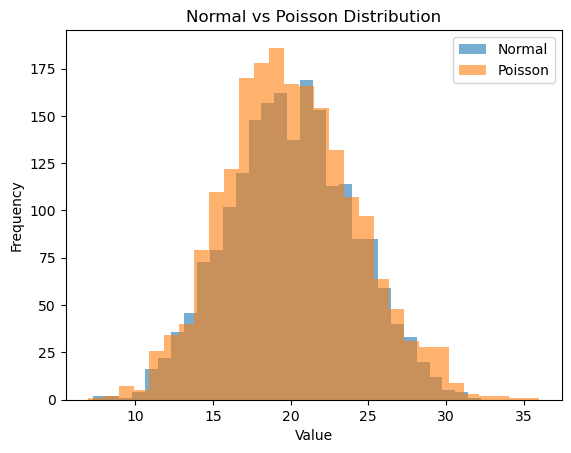

In [2]:
'''Task 2 -
Simulate 2000 samples from:
• Normal distribution (mean = 20, std = 4)
• Poisson distribution (lambda = 20)
Plot both histograms on the same graph.
Explain why Poisson becomes similar to Normal for large lambda.'''
import random
import math
import matplotlib.pyplot as plt

# ----- Simple Poisson function -----
def poisson_random(lmbda):
    L = math.exp(-lmbda)
    k = 0
    p = 1
    while p > L:
        k += 1
        p *= random.random()
    return k - 1

# ----- Parameters -----
normal_samples = []
poisson_samples = []
mean = 20
std = 4
lmbda = 20
num_samples = 2000

# Step 1: Generate normal samples
for _ in range(num_samples):
    normal_samples.append(random.normalvariate(mean, std))

# Step 2: Generate Poisson samples
for _ in range(num_samples):
    poisson_samples.append(poisson_random(lmbda))

# Step 3: Plot both histograms
plt.hist(normal_samples, bins=30, alpha=0.6, label='Normal')
plt.hist(poisson_samples, bins=30, alpha=0.6, label='Poisson')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal vs Poisson Distribution')
plt.legend()
plt.show()


In [13]:
'''Task 3 -
Write a function simulate_binomial_estimation(n, p, trials) that simulates binomial outcomes.
Run with n=20, p=0.4, trials=5000.
Compare the empirical probability of k=8 with the theoretical value.
'''   
import random

# Factorial function
def factorial(num):
    result = 1
    for i in range(1, num + 1):
        result *= i
    return result

# Binomial probability
def binomial_prob(n, k, p):
    nCk = factorial(n) / (factorial(k) * factorial(n - k))
    prob = nCk * (p ** k) * ((1 - p) ** (n - k))
    return prob

# Simulation function
def simulate_binomial_estimation(n, p, trials):
    count_k8 = 0
    for _ in range(trials):
        success = 0
        for _ in range(n):
            if random.random() < p:
                success += 1
        if success == 8:
            count_k8 += 1
    print('count_k8:',count_k8)        
    return count_k8 / trials  # empirical probability

# Parameters
n = 20
p = 0.4
trials = 5000
k = 8

# Run simulation and calculate theoretical probability
empirical = simulate_binomial_estimation(n, p, trials)
theoretical = binomial_prob(n, k, p)  # Correct order: n, k, p

print("Empirical Probability of k=8:", empirical)
print("Theoretical Probability of k=8:", theoretical)


count_k8: 835
Empirical Probability of k=8: 0.167
Theoretical Probability of k=8: 0.17970578775468934


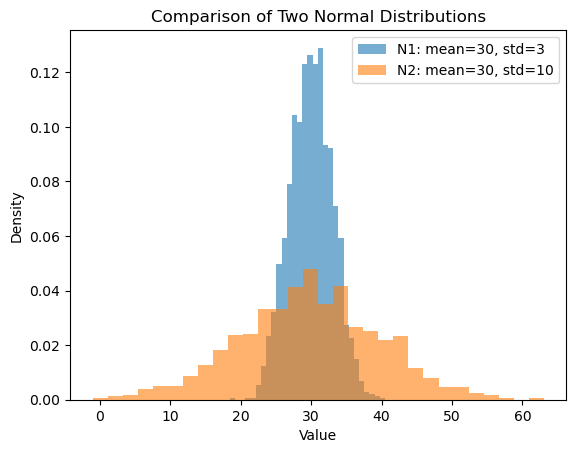

In [14]:
'''Task 4 - 
Generate two normal distributions:
• N1 mean=30, std=3
• N2 mean=30, std=10
Plot both curves on same graph.
Explain how standard deviation affects the shape.'''

'''
Standard deviation affects the shape of a distribution by controlling its spread:
Small SD: data is close to the mean → tall and narrow curve.
Large SD: data is spread out → short and wide curve.'''

import random
import matplotlib.pyplot as plt

num_samples = 2000

# N1: mean=30, std=3
N1_samples = [random.normalvariate(30, 3) for _ in range(num_samples)]

# N2: mean=30, std=10
N2_samples = [random.normalvariate(30, 10) for _ in range(num_samples)]



plt.hist(N1_samples, bins=30, alpha=0.6, label='N1: mean=30, std=3', density=True)
plt.hist(N2_samples, bins=30, alpha=0.6, label='N2: mean=30, std=10', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Two Normal Distributions')
plt.legend()
plt.show()



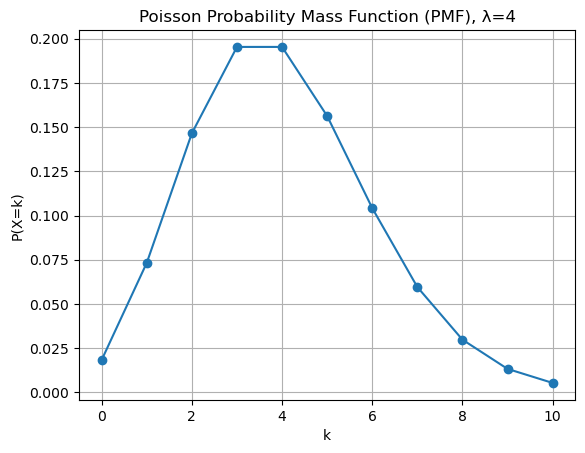

Highest probability is at k=3, P=0.1954


In [6]:
'''Task 5 - 
Use poisson_prob to compute probabilities for k = 0 to 10 when lambda = 4.
Plot the probability mass function (PMF).
Identify which k has the highest probability.'''

import math
import matplotlib.pyplot as plt

# factorial function
def factorial(k):
    result = 1
    for i in range(1, k+1):
        result *= i
    return result

# Poisson probability function
def poisson_prob(lmbda):
    samples = []
    for k in range(11):  # 0 to 10 inclusive
        p = (lmbda**k * math.exp(-lmbda)) / factorial(k)
        samples.append(p)
    return samples

lmbda = 4
poisson_samples = poisson_prob(lmbda)
k_values = list(range(11))  # k = 0 to 10

# Plot PMF
plt.plot(k_values, poisson_samples, marker='o')
plt.title("Poisson Probability Mass Function (PMF), λ=4")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.grid(True)
plt.show()

# Identify which k has the highest probability
max_prob = max(poisson_samples)
k_max = k_values[poisson_samples.index(max_prob)]
print(f"Highest probability is at k={k_max}, P={max_prob:.4f}")